# Generate the files

## Requirements

[rustup](https://rustup.rs/)
[python3](https://www.python.org/downloads/)

Maybe virtual env?

## Step by Step
We need to locate the directory where the replays are, in my case I dual-boot and mount windows to `/mnt/windows`

The final step takes around 32 seconds to process 3600 Replay files. This means about 110 replays per-second on a 16 Core machine.
```bash
$ git clone https://github.com/sebosp/s2protocol-rs
$ cd s2protocol-rs
$ mkdir ipcs/
$ cargo run --features arrow -r -- --timing --source "/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/" --output ipcs/ write-arrow-ipc all'
$ cd ipcs
$ du -sh *
3.8M    details.ipc
27M     init_data.ipc
441M    stats.ipc
3.3G    unit_born.ipc
2.4G    unit_died.ipc
37M     upgrades.ipc
$ cd ..
$ pip install -r requirements.txt
$ jupyter lab --notebook-dir=jupyter_notebooks/
# Open the URL explained in the terminal, this will open this notebook for interacting with the data.
```


In [29]:
# import datashader as ds
import plotly.express as px
import polars as pl

pl.Config.set_tbl_width_chars(256)
pl.Config.set_fmt_str_lengths(256)

unit_born_df = pl.scan_ipc("/home/seb/git/s2protocol-rs/ipcs/unit_born.ipc")
unit_died_df = pl.scan_ipc("/home/seb/git/s2protocol-rs/ipcs/unit_died.ipc")
stats_df = pl.scan_ipc("/home/seb/git/s2protocol-rs/ipcs/stats.ipc")
details_df = pl.scan_ipc("/home/seb/git/s2protocol-rs/ipcs/details.ipc")

latest_replay_digest = details_df.collect().sort("ext_datetime", descending=True).select(pl.col("ext_fs_replay_sha256")).limit(1)
# In this case I'm interested in my own user data.
my_username = "2-1-8459957-Sazed"
# To find your user, you can inspect a replay, for example the latest one, this is a combination of the blizzard ids, region, etc.
unit_born_df.filter(
    (pl.col("ext_fs_replay_sha256") == latest_replay_digest)
).group_by("ext_replay_detail_player_name").agg(pl.count()).collect()
details_df.explode("player_list").unnest("player_list").collect().limit(5)

name,toon,race,color,control,team_id,handicap,observe,result,working_set_slot_id,hero,title,difficulty,thumbnail,is_blizzard_map,time_utc,time_local_offset,restart_as_transition_map,disable_recover_game,description,image_file_path,campaign_index,map_file_name,cache_handles,mini_save,game_speed,default_difficulty,mod_paths,ext_fs_replay_file_name,ext_fs_replay_sha256,ext_datetime
str,struct[4],str,struct[4],u8,u8,u32,u8,u8,u8,str,str,str,struct[1],bool,i64,i64,bool,bool,str,str,u8,str,list[str],bool,u8,u32,list[str],str,str,datetime[ns]
"""Sazed""","{2,21298,1,8459957}","""Zerg""","{255,180,20,30}",2,0,100,0,1,0,"""""","""2000 Atmospheres LE""","""""","{""Minimap.tga""}",true,132633797888505338,72000000000,false,false,"""""","""""",0,"""""","[""0x73326d610045556de4153baccd0565636b6f27db88169fa1989bb6357b1b215a2547939f5fb"", ""0x73326d61004555421c8aa0f3619b652d23a2735dfee812ab644228235e7a797edecfe8b67da3e"", … ""0x73326d61004555c2bcc137d9ce43fbf9a5ddd04f5167892c779c29616de980bf7e92f31cdc1742""]",false,4,3,[],"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/2000 Atmospheres LE (10).SC2Replay""","""5dc8bbcac314379cdaa236bea6d51f8c4cd3f8a90972767886290be7d7a6fd74""",2021-04-20 06:09:48.850533
"""A.I. 1 (Elite)""","{0,0,0,0}","""Terran""","{255,0,66,255}",3,1,100,0,2,1,"""""","""2000 Atmospheres LE""","""""","{""Minimap.tga""}",true,132633797888505338,72000000000,false,false,"""""","""""",0,"""""","[""0x73326d610045556de4153baccd0565636b6f27db88169fa1989bb6357b1b215a2547939f5fb"", ""0x73326d61004555421c8aa0f3619b652d23a2735dfee812ab644228235e7a797edecfe8b67da3e"", … ""0x73326d61004555c2bcc137d9ce43fbf9a5ddd04f5167892c779c29616de980bf7e92f31cdc1742""]",false,4,3,[],"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/2000 Atmospheres LE (10).SC2Replay""","""5dc8bbcac314379cdaa236bea6d51f8c4cd3f8a90972767886290be7d7a6fd74""",2021-04-20 06:09:48.850533
"""Sazed""","{2,21298,1,8459957}","""Zerg""","{255,180,20,30}",2,0,100,0,1,0,"""""","""2000 Atmospheres LE""","""""","{""Minimap.tga""}",true,132860509584821001,36000000000,false,false,"""""","""""",0,"""""","[""0x73326d610045556de4153baccd0565636b6f27db88169fa1989bb6357b1b215a2547939f5fb"", ""0x73326d61004555421c8aa0f3619b652d23a2735dfee812ab644228235e7a797edecfe8b67da3e"", … ""0x73326d6100455568935c92125a382834dd3f93212efadf8ec33b491b7bddee158c3daccc8df""]",false,4,3,[],"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/2000 Atmospheres LE (100).SC2Replay""","""defb61faf18809ba3f5944b674eca0a1dd941c114b6e0835566298ca7b68cec8""",2022-01-07 16:42:38.482100
"""krapula""","{2,21298,1,5717534}","""Terran""","{255,0,66,255}",2,1,100,0,2,1,"""""","""2000 Atmospheres LE""","""""","{""Minimap.tga""}",true,132860509584821001,36000000000,false,false,"""""","""""",0,"""""","[""0x73326d610045556de4153baccd0565636b6f27db88169fa1989bb6357b1b215a2547939f5fb"", ""0x73326d61004555421c8aa0f3619b652d23a2735dfee812ab644228235e7a797edecfe8b67da3e"", … ""0x73326d6100455568935c92125a382834dd3f93212efadf8ec33b491b7bddee158c3daccc8df""]",false,4,3,[],"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/2000 Atmospheres LE (100).SC2Replay""","""defb61faf18809ba3f5944b674eca0a1dd941c114b6e0835566298ca7b68cec8""",2022-01-07 16:42:38.482100
"""vanhelsing""","{2,21298,1,10036365}","""Terran""","{255,180,20,30}",2,0,100,0,2,0,"""""","""2000 Atmospheres LE""","""""","{""Minimap.tga""}",true,132860579482607642,36000000000,false,false,"""""","""""",0,"""""","[""0x73326d610045556de4153baccd0565636b6f27db88169fa1989bb6357b1b215a2547939f5fb"", ""0x73326d61004555421c8aa0f3619b652d23a2735dfee812ab644228235e7a797edecfe8b67da3e"", … ""0x73326d6100455568935c92125a382834dd3f93212efadf8ec33b491b7bddee158c3daccc8df""]",false,4,3,[],"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Mu

In [30]:
details_df.filter(
    pl.col("ext_fs_replay_sha256")
    == latest_replay_digest
).select(
    [
        pl.col("ext_fs_replay_sha256"),
        pl.col("ext_datetime"),
        pl.col("ext_fs_replay_file_name"),
    ]
).collect().sort(
    "ext_datetime", descending=True
)

ext_fs_replay_sha256,ext_datetime,ext_fs_replay_file_name
str,datetime[ns],str
"""bcdc9f4529f33d8dc195e077a3efc8f2f5d171629589810258ce9c3b2884d606""",2023-09-01 16:27:20.513336,"""/mnt/windows/Users/sebos/Documents/StarCraft II/Accounts/51504154/2-S2-1-8459957/Replays/Multiplayer/Fields of Death (349).SC2Replay"""


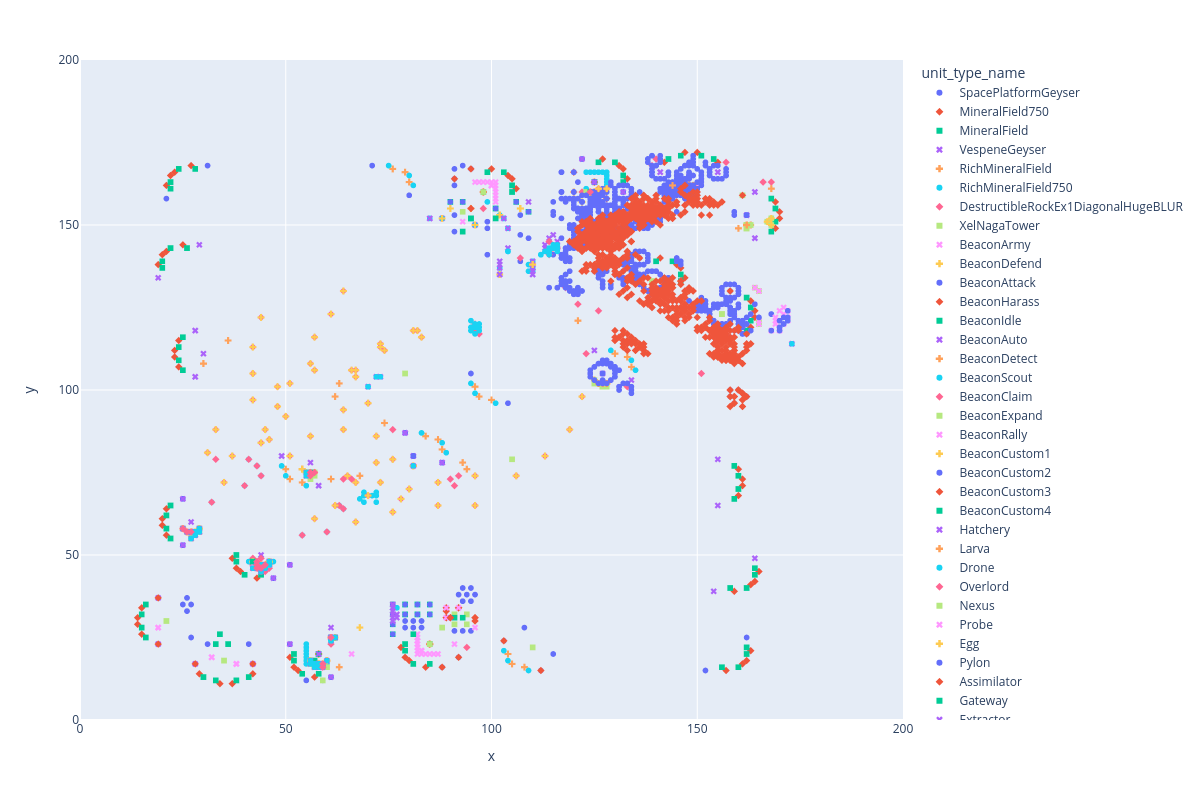

x,y,name_index,unit_tag_index,unit_type_name,ext_replay_loop
f32,f32,str,u32,str,i64
51.0,23.0,"""SpacePlatformGeyser0""",0,"""SpacePlatformGeyser""",0
29.0,14.0,"""MineralField7501""",1,"""MineralField750""",0
30.0,13.0,"""MineralField2""",2,"""MineralField""",0
33.0,12.0,"""MineralField3""",3,"""MineralField""",0
34.0,11.0,"""MineralField7504""",4,"""MineralField750""",0
37.0,11.0,"""MineralField7505""",5,"""MineralField750""",0
38.0,12.0,"""MineralField6""",6,"""MineralField""",0
41.0,13.0,"""MineralField7""",7,"""MineralField""",0
42.0,14.0,"""MineralField7508""",8,"""MineralField750""",0


In [31]:
unit_born_ec_le = (
    (
        unit_born_df.join(details_df, on="ext_fs_replay_sha256", how="inner")
        .filter(
            (
                pl.col("ext_fs_replay_sha256")
                == latest_replay_digest
            )
            # & (pl.col("unit_type_name") == "Hatchery")
            & (pl.col("unit_type_name") != "InvisibleTargetDummy")
        )
        .with_columns(
            pl.concat_str(pl.col("unit_type_name"), pl.col("unit_tag_index")).alias(
                "name_index"
            )
        )
        .select(
            [
                pl.col("x"),
                pl.col("y"),
                pl.col("name_index"),
                pl.col("unit_tag_index"),
                pl.col("unit_type_name"),
                pl.col("ext_replay_loop"),
            ]
        )
    )
    .collect()
    .sort("ext_replay_loop")
)

unit_born_map = px.scatter(
    unit_born_ec_le,
    x="x",
    y="y",
    color="unit_type_name",
    symbol="unit_type_name",
    width=1200,
    height=800,
    range_x=(0, 200),
    range_y=(0, 200)
)
unit_born_map.show(renderer="png")
unit_born_ec_le.head(100)

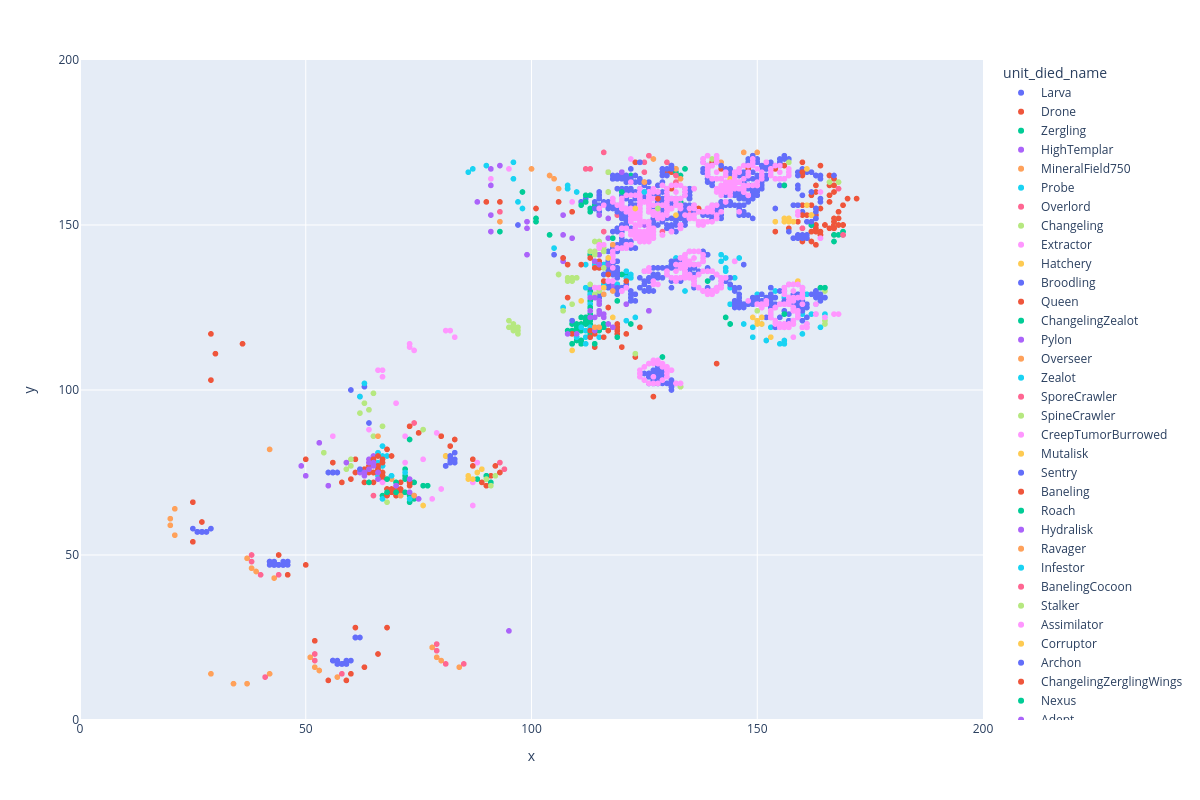

In [32]:
unit_died_test1 = (
    unit_died_df.filter(
        pl.col("ext_fs_replay_sha256")
        == latest_replay_digest
    )
    .select(["unit_died_name", "x", "y"])
    .collect()
)
fig = px.scatter(
    unit_died_test1,
    x="x",
    y="y",
    color="unit_died_name",
    width=1200,
    height=800,
    range_x=(0, 200),
    range_y=(0, 200),
)
fig.show(renderer="png")

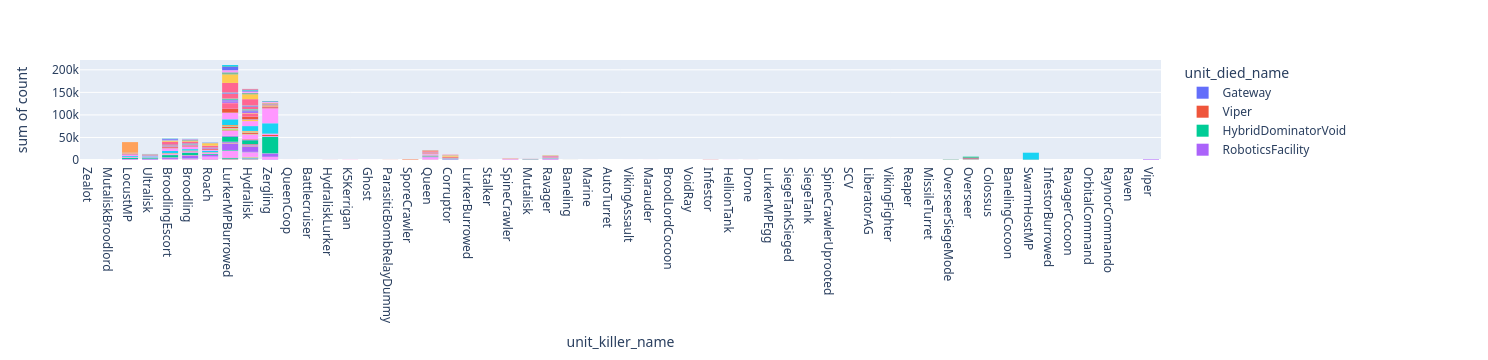

In [68]:
unit_died_ec_le = (
    unit_died_df.join(details_df, on="ext_fs_replay_sha256", how="inner")
    .filter(
        (pl.col("ext_replay_detail_killer_player_name") == my_username)
        & (pl.col("unit_killer_name") != "")
        & (pl.col("unit_died_name") != "InvisibleTargetDummy")
    )
    .select(
        [
            pl.col("ext_replay_detail_killer_player_name"),
            pl.col("unit_died_name"),
            pl.col("unit_tag_index"),
            pl.col("unit_killer_name"),
            pl.col("killer_unit_tag_index"),
            pl.col("ext_replay_loop"),
            pl.col("ext_replay_seconds"),
        ]
    )
)
unit_killer_to_died_freq = (
    unit_died_ec_le.group_by(["unit_killer_name", "unit_died_name"])
    .agg(pl.count().alias("count"))
    .collect()
    .sort("count")
)
unit_killer_freq = (
    unit_died_ec_le.group_by(["unit_killer_name"])
    .agg(pl.count().alias("count"))
    .collect()
    .sort("count")
)
unit_died_freq = (
    unit_died_ec_le.group_by(["unit_died_name"])
    .agg(pl.count().alias("count"))
    .collect()
    .sort("count")
)
hist = px.histogram(
    unit_killer_to_died_freq, x="unit_killer_name", y="count", color="unit_died_name")
# Q: What is the unit that kills other units the most across all my game history?
# A: LurkerMPBurrowed killed 21k marines:

hist.show(renderer="png")
# unit_killer_pie = px.pie(unit_killer_freq, names="unit_killer_name", values="count")
# unit_killer_pie.show()

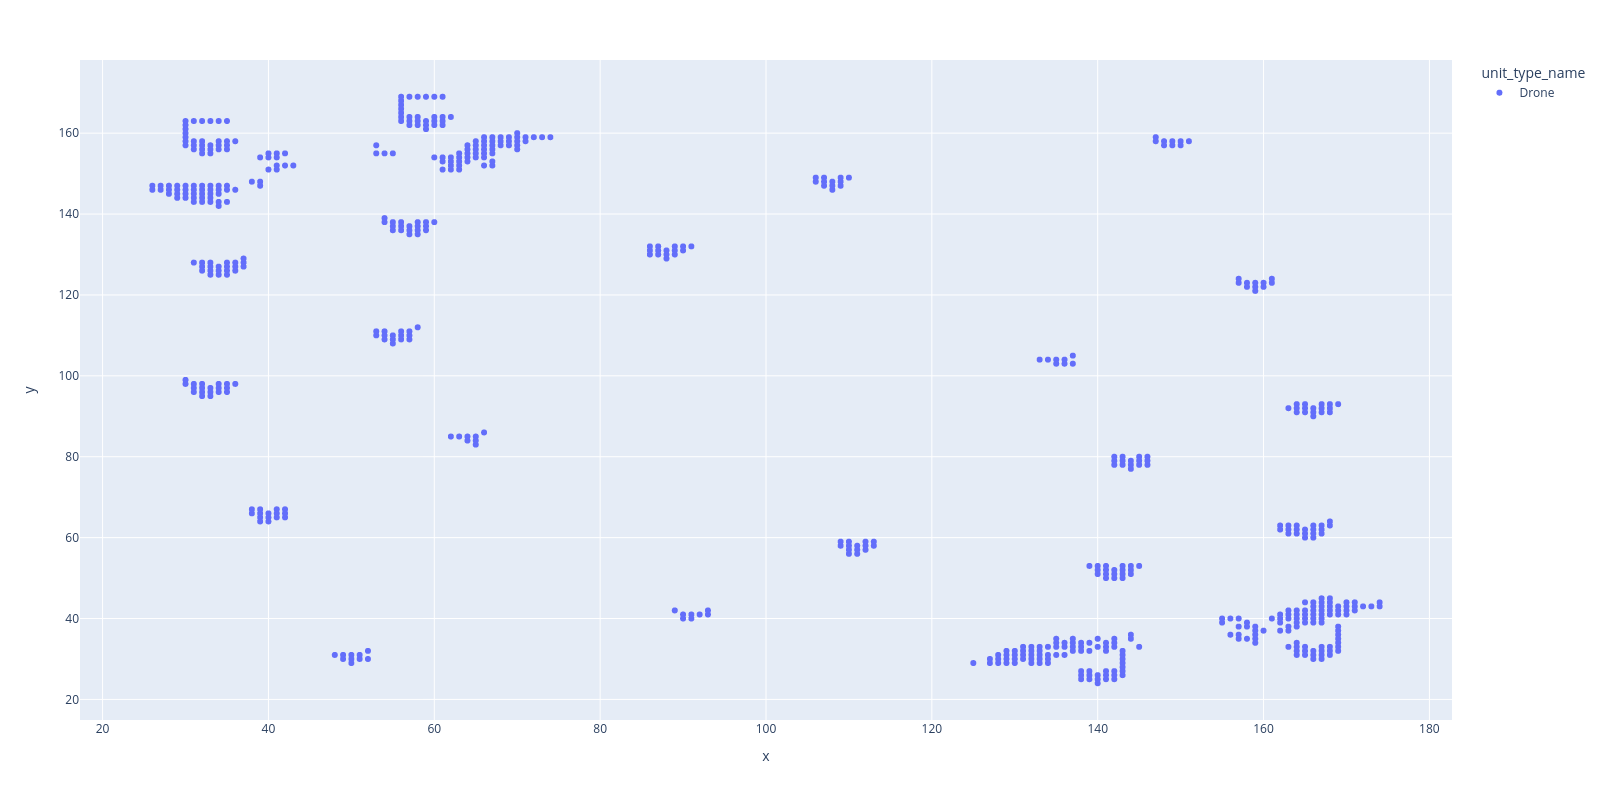

In [67]:
unit_born_ec_le = (
    unit_born_df.join(details_df, on="ext_fs_replay_sha256", how="inner")
    .filter(
        (pl.col("ext_replay_detail_player_name") == my_username)
        & (pl.col("title") == "Emerald City LE")
        & (pl.col("unit_type_name") == "Drone")
    )
    .select([pl.col("x"), pl.col("y"), pl.col("unit_type_name")])
    .group_by(["x", "y", "unit_type_name"])
    .agg(pl.sum("unit_type_name").alias("count"))
    .collect()
)
fig = px.scatter(unit_born_ec_le, x="x", y="y", color="unit_type_name", render_mode="svg", width=1600, height=800)
fig.show(renderer="png")